     X1    X2  Y
0 -0.70 -0.06  1
1  0.85 -0.18  1
2 -0.07 -0.83 -1
3  0.51 -0.48 -1
4 -0.27  0.22  1


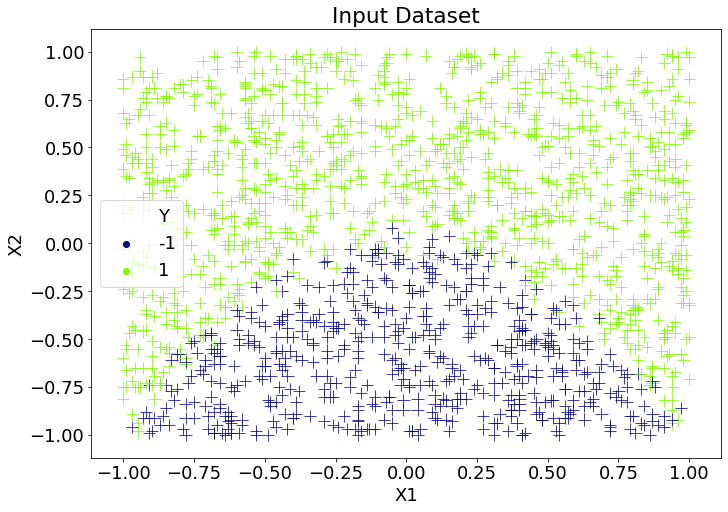

In [237]:
#importing all necessary packages and definning parameter value:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
plt.rcParams['figure.figsize'] = (10.0,7.0)
plt.rcParams['figure.constrained_layout.use']= True
plt.rc('font',size=18)

#plot_the_import_dataset_Wee2.csv and rename the column values.
df = pd.read_csv('Dataset_1.csv',header = None,skiprows =1)
df.columns=['X1','X2','Y']
#check data are imported correctly or not
print(df.head())
#plot the graph
sbn.scatterplot(x='X1',y='X2', hue='Y', s=150, palette =['darkblue','lawngreen'], marker='+', data=df)
plt.title('Input Dataset')
plt.show()

In [212]:
#Assign each column Values:
X1=df.iloc[:,0]
X2=df.iloc[:,1]
X=np.column_stack((X1,X2))
y=df.iloc[:,2]


The executed polynomial is 1
Score
[0.8652743511229524]
The executed polynomial is 2
Score
[0.9682704941065831]
The executed polynomial is 3
Score
[0.9694698971023932]
The executed polynomial is 4
Score
[0.9688693072373473]
The executed polynomial is 5
Score
[0.9688657215621198]
The executed polynomial is 6
Score
[0.9694645239573294]
The executed polynomial is 8
Score
[0.9682669191669102]
The executed polynomial is 10


C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Score
[0.9670711018463276]
Mean error [0.5389221556886228, 0.33053892215568864, 0.26107784431137726, 0.22694610778443114, 0.20598802395209584, 0.1920159680638723, 0.18306244653550047, 0.17694610778443115]
Std error [0.03213510865867959, 0.039535719529657676, 0.04050488698916847, 0.039179227191995555, 0.03867131398869984, 0.038332705186502704, 0.0380908417563619, 0.03770934846445971]


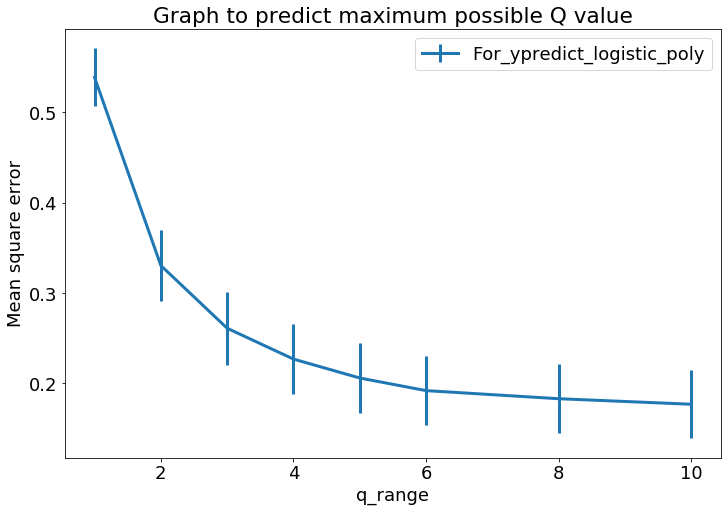

In [238]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mean_error=[]; std_error=[];
mean_q=[]; std_error_q=[];
q_range = [1,2,3,4,5,6,8,10]
for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly = PolynomialFeatures(q).fit_transform(X)
    Ci_range = [0.01, 0.1, 1, 5, 10, 15]
    print('The executed polynomial is {}'.format(q))
    for Ci in Ci_range:
        scores=[];
        model= LogisticRegression(C=Ci, solver='lbfgs')
        scores.append(cross_val_score(model, Xpoly, y, cv=5, scoring='accuracy').mean())
        temp=[]; 
        for train, test in kf.split(Xpoly):
            model.fit(Xpoly[train], y[train])
            ypred = model.predict(Xpoly[test])
            temp.append(mean_squared_error(y[test],ypred))
    print('Score')
    print(scores)
    mean_error.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
    mean_q.append(np.array(mean_error).mean()) 
    std_error_q.append(np.array(std_error).mean())
print('Mean error {}'.format (mean_q))
print('Std error {}'.format(std_error_q))
plt.errorbar(q_range,mean_q,yerr=std_error_q,linewidth=3)
plt.legend(["For_ypredict_logistic_poly"])
plt.xlabel('q_range')
plt.title('Graph to predict maximum possible Q value')
plt.ylabel('Mean square error')
plt.show()

Scores [0.8544994400066346, 0.947319549418039, 0.9628776868744694, 0.9670746875215549, 0.9682687066367466, 0.9688675090319563, 0.9694645239573294]


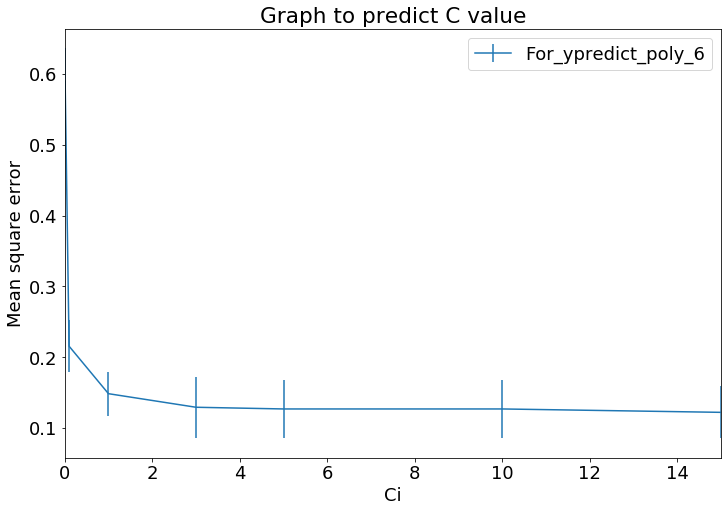

In [239]:
#adding features to the dataset using polynomial feature function.
from sklearn.preprocessing import PolynomialFeatures
Xpoly_6 = PolynomialFeatures(6).fit_transform(X)
#train and test for polynomial = 6 to find best fit c value in logistic regression.
mean_error_6=[]; std_error_6=[]; scores_6=[];
Ci_range = [0.01, 0.1, 1,3, 5, 10, 15]
for Ci in Ci_range:
    temp_6=[]
    model_6 = LogisticRegression(C=Ci, solver='lbfgs')
    scores_6.append(cross_val_score(model_6, Xpoly_6, y, cv=5, scoring='accuracy').mean())
    kf = KFold(n_splits=5)
    for train, test in kf.split(Xpoly_6):
        model_6.fit(Xpoly_6[train], y[train])
        ypred_6 = model_6.predict(Xpoly_6[test])
        temp_6.append(mean_squared_error(y[test],ypred_6))
    mean_error_6.append(np.array(temp_6).mean())
    std_error_6.append(np.array(temp_6).std())
print('Scores {}'.format(scores_6))
plt.errorbar(Ci_range,mean_error_6,yerr=std_error_6)
plt.legend(["For_ypredict_poly_6"])
plt.xlabel('Ci'); plt.ylabel('Mean square error')
plt.title('Graph to predict C value')
plt.xlim((0,15))
plt.show()

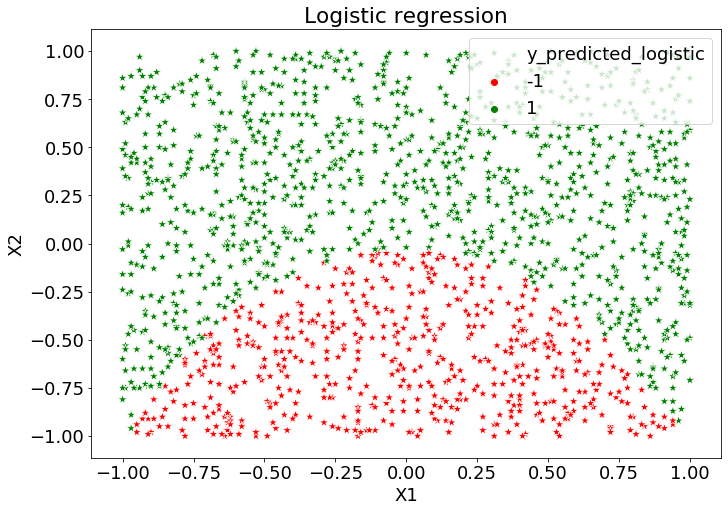

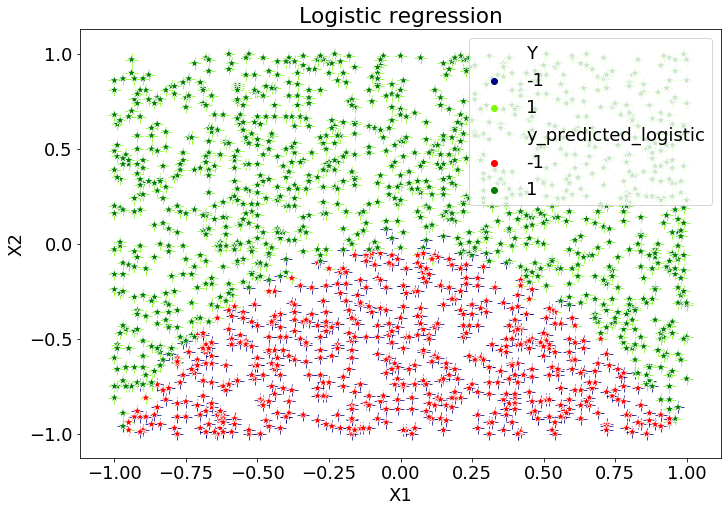

In [240]:
# the optimal solution found out is Polynomial max value of 6 and c value of 3
scores_true=[];    
model_true= LogisticRegression(C=3, solver='lbfgs')
scores_true = (cross_val_score(model_true, Xpoly_6, y, cv=5, scoring='accuracy').mean())
model_true.fit(Xpoly_6, y)
ypred_true=model_true.predict(Xpoly_6)
df['y_predicted_logistic']=ypred_true
#plot the graph predicted y for logistic regression.
sbn.scatterplot(x='X1',y='X2', hue='y_predicted_logistic',palette=['r','g'],marker='*',s=100, data=df)
plt.title('Logistic regression')
plt.show()
#both y and y predicted.
sbn.scatterplot(x='X1',y='X2', hue='Y', s=150, palette =['darkblue','lawngreen'], marker='+', data=df)
sbn.scatterplot(x='X1',y='X2', hue='y_predicted_logistic',palette=['r','g'],marker='*',s=100, data=df)
plt.title('Logistic regression')
plt.show()


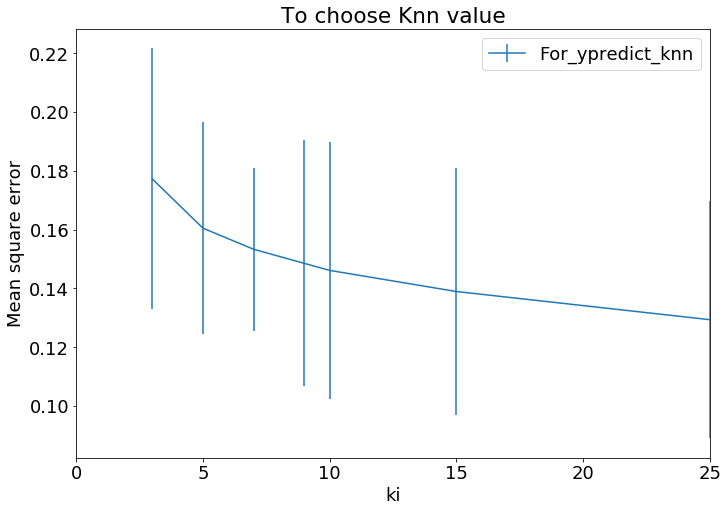

In [241]:
#Implementing Knn model
mean_error_knn=[]; std_error_knn=[]; scores_knn=[];
ki_range = [3,5,7,9,10,15,25]
for ki in ki_range:
    temp_knn=[]
    model_knn = KNeighborsClassifier(n_neighbors=ki,weights='uniform') 
    kf = KFold(n_splits=5)
    for train, test in kf.split(X):
        model_knn.fit(X[train], y[train])
        ypred_knn = model_knn.predict(X[test])
        temp_knn.append(mean_squared_error(y[test],ypred_knn))
    mean_error_knn.append(np.array(temp_knn).mean())
    std_error_knn.append(np.array(temp_knn).std())
plt.errorbar(ki_range,mean_error_knn,yerr=std_error_knn)
plt.legend(["For_ypredict_knn"])
plt.xlabel('ki'); plt.ylabel('Mean square error')
plt.xlim((0,25))
plt.title('To choose Knn value')
plt.show()





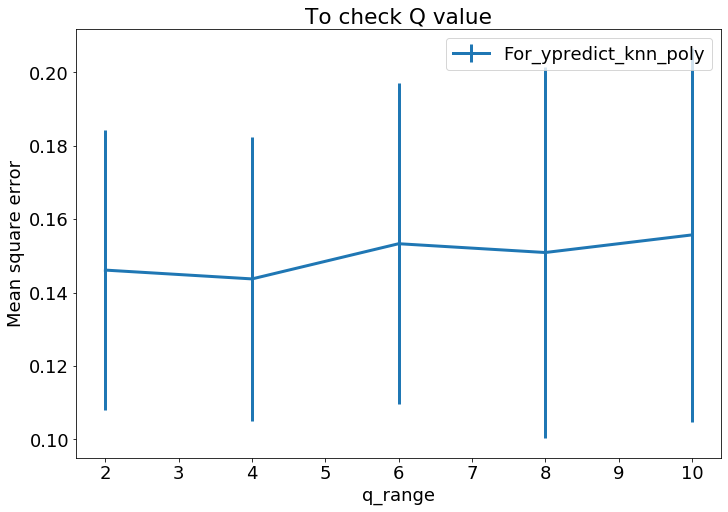

In [242]:
#testing for polynomial features:

kf = KFold(n_splits=5)
mean_error_poly_knn=[]; std_error_poly_knn=[];
q_range = [2,4,6,8,10]
for q in q_range:
    from sklearn.preprocessing import PolynomialFeatures
    Xpoly_knn = PolynomialFeatures(q).fit_transform(X)
    model_poly_knn= KNeighborsClassifier(n_neighbors=7,weights='uniform')
    temp_poly_knn=[]; 
    for train, test in kf.split(Xpoly_knn):
        model_poly_knn.fit(Xpoly_knn[train], y[train])
        ypred_poly_knn = model_poly_knn.predict(Xpoly_knn[test])
        temp_poly_knn.append(mean_squared_error(y[test],ypred_poly_knn))
    mean_error_poly_knn.append(np.array(temp_poly_knn).mean())
    std_error_poly_knn.append(np.array(temp_poly_knn).std())
#plotting the error bar
plt.errorbar(q_range,mean_error_poly_knn,yerr=std_error_poly_knn,linewidth=3)
plt.legend(["For_ypredict_knn_poly"])
plt.xlabel('q_range')
plt.ylabel('Mean square error')
plt.title('To check Q value')
plt.show()

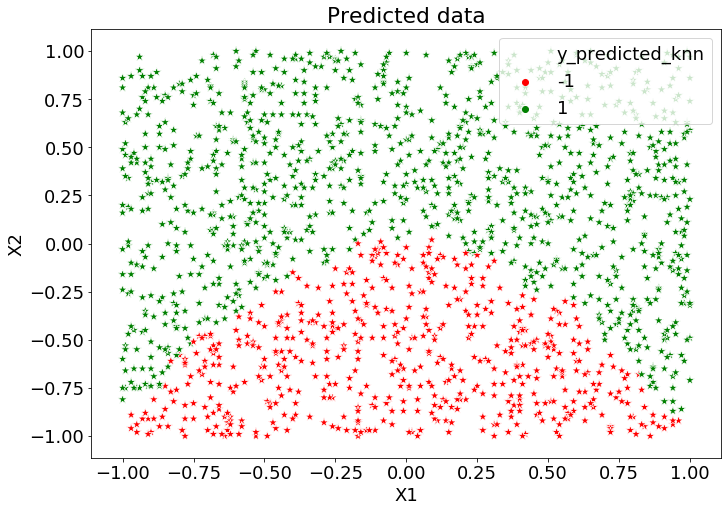

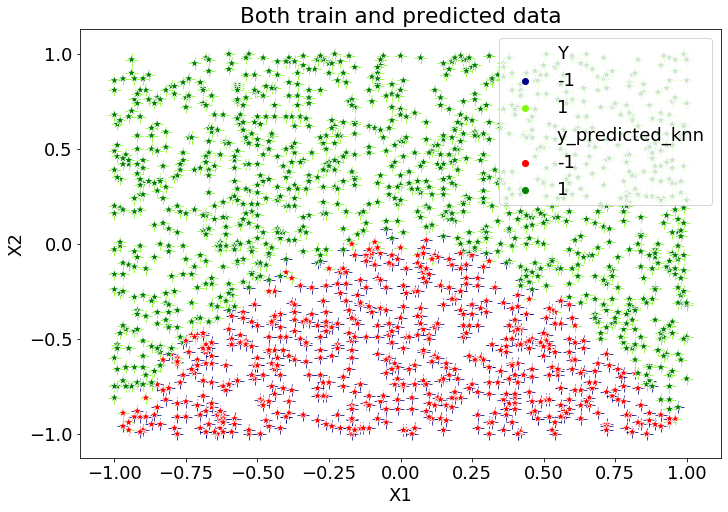

In [244]:
#trainning and predicting knn classifier for optimal solution
#Implementing Knn model
model_knn_true = KNeighborsClassifier(n_neighbors=7,weights='uniform') 
model_knn_true.fit(X, y)
ypred_knn_true = model_knn_true.predict(X)
df['y_predicted_knn']=ypred_knn_true
#plot the graph predicted y for logistic regression.
sbn.scatterplot(x='X1',y='X2', hue='y_predicted_knn',palette=['r','g'],marker='*',s=100, data=df)
plt.title('Predicted data')
plt.show()
#both y and y predicted.
sbn.scatterplot(x='X1',y='X2', hue='Y', s=150, palette =['darkblue','lawngreen'], marker='+', data=df)
sbn.scatterplot(x='X1',y='X2', hue='y_predicted_knn',palette=['r','g'],marker='*',s=100, data=df)
plt.title('Both train and predicted data')
plt.show()



In [232]:
#Confusion matrics for linear, Knn and baseline predictor
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
X_train,X_test,y_train,y_test = train_test_split(Xpoly_6,y,test_size=0.05,shuffle=False,stratify=None)
model_logistic_conf=LogisticRegression(C=3, solver='lbfgs')
model_logistic_conf.fit(X_train,y_train)
ypred_logistic_conf=model_logistic_conf.predict(X_test)
cmtx_logistic = pd.DataFrame(
    confusion_matrix(y_test, ypred_logistic_conf), 
    index=['true:yes', 'true:no'], 
    columns=['pred:yes', 'pred:no']
)
print (cmtx_logistic)
print(classification_report(y_test, ypred_logistic_conf))
fpr, tpr, _ = roc_curve(y_test, model_logistic_conf.decision_function(X_test))


          pred:yes  pred:no
true:yes        30        1
true:no          1       52
              precision    recall  f1-score   support

          -1       0.97      0.97      0.97        31
           1       0.98      0.98      0.98        53

    accuracy                           0.98        84
   macro avg       0.97      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84



In [233]:
#For knn model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05,shuffle=False,stratify=None)
model_knn_conf=KNeighborsClassifier(n_neighbors=7,weights='uniform')
model_knn_conf.fit(X_train,y_train)
ypred_knn_conf=model_knn_conf.predict(X_test)
cmtx_knn = pd.DataFrame(
    confusion_matrix(y_test, ypred_knn_conf), 
    index=['true:yes', 'true:no'], 
    columns=['pred:yes', 'pred:no']
)
print (cmtx_knn)
print(classification_report(y_test, ypred_knn_conf))


          pred:yes  pred:no
true:yes        30        1
true:no          3       50
              precision    recall  f1-score   support

          -1       0.91      0.97      0.94        31
           1       0.98      0.94      0.96        53

    accuracy                           0.95        84
   macro avg       0.94      0.96      0.95        84
weighted avg       0.95      0.95      0.95        84



In [234]:
#for Dummy classifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.05,shuffle=False,stratify=None)
from sklearn.dummy import DummyClassifier
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
ydummy = dummy.predict(X_test)
print(confusion_matrix(y_test, ydummy))
print(classification_report(y_test, ydummy))

[[ 0 31]
 [ 0 53]]
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        31
           1       0.63      1.00      0.77        53

    accuracy                           0.63        84
   macro avg       0.32      0.50      0.39        84
weighted avg       0.40      0.63      0.49        84



C:\Users\gowtham\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


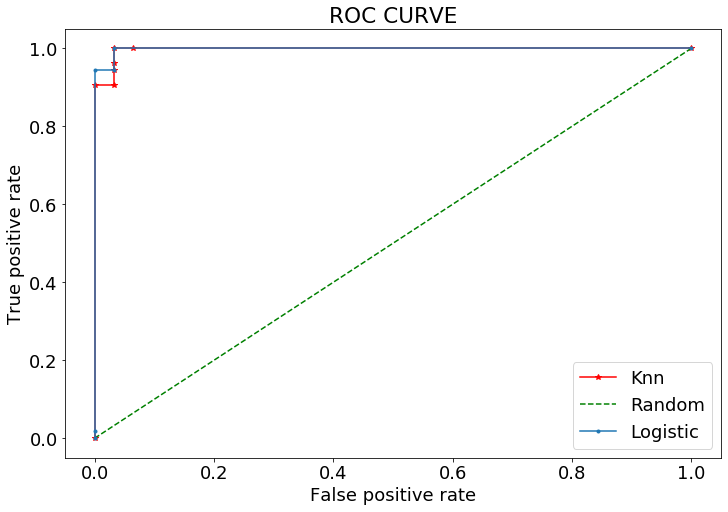

AUC Logistic: 0.974
AUC Knn: 0.956


In [246]:
#Implementing ROC curve
from sklearn.metrics import roc_curve
y_scores = model_knn_conf.predict_proba(X_test)
fpr1, tpr1, threshold = roc_curve(y_test, y_scores[:, 1])
plt.plot(fpr1, tpr1, marker='*',color='red', label='Knn')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random',color ='green')
plt.plot(fpr, tpr, marker='.', label='Logistic')
plt.legend()
plt.title('ROC CURVE')
plt.show()
#Auc value

auc = roc_auc_score(y_test,ypred_logistic_conf)
print('AUC Logistic: %.3f' % auc)

auc1 = roc_auc_score(y_test,ypred_knn_conf )
print('AUC Knn: %.3f' % auc1)

